In [1]:
from scipy.io import arff
import pandas as pd
import os
import seaborn as sns

In [40]:
def fetch_datasets(dataset):
    
    data = arff.loadarff('../../ALIH/datasets/' + dataset)
    metadata = data[1]
    data = pd.DataFrame(data[0])
    
    instances = len(data)
    classes = len(data.iloc[:,-1].value_counts())
    attributes = len(data.columns)- 1
    nominal_attributes = str(metadata).count("nominal")
    
    proportion = data.iloc[:,-1].value_counts()
    proportion = proportion.map(lambda x: round(x/instances*100,2))

    majority = max(proportion)
    minority = min(proportion)

    
    return {
        "name": dataset[:-5],
        "instances": instances,
        "classes": classes,
        "attributes": attributes,
        "nominal attributes": nominal_attributes,
        "majority": majority,
        "minority": minority
    }

In [41]:
datasets = os.listdir('../../ALIH/datasets')

In [42]:
data = []

for ds in datasets:
    data.append(fetch_datasets(ds))

data = pd.DataFrame.from_dict(data)

In [43]:
data["attributes / nominal"] = data["attributes"].astype(str) + " / " + data["nominal attributes"].astype(str)

In [64]:
data = data.sort_values("attributes", ascending = False).drop(["attributes", "nominal attributes"], axis = 1)

KeyError: 'attributes'

In [48]:
data = data[["name", "instances", "classes", "attributes / nominal", "majority", "minority"]]

In [61]:
data["name"] = data["name"].apply(lambda x: x.split(sep="_")[0])

In [62]:
data.to_csv("./table.csv")

In [65]:
data

,name,instances,classes,attributes / nominal,majority,minority
15,1485,2600,2,500 / 1,50.00,50.00
53,312,2407,2,299 / 6,82.09,17.91
23,1501,1593,10,256 / 1,10.17,9.73
8,12,2000,10,216 / 1,10.00,10.00
7,1116,6598,2,167 / 2,84.59,15.41
...,...,...,...,...,...,...
31,1535,9989,5,3 / 1,96.10,0.26
30,1528,1623,5,3 / 1,90.63,1.79
29,1527,3252,5,3 / 1,90.77,1.78
35,1541,8654,5,3 / 1,94.33,0.65


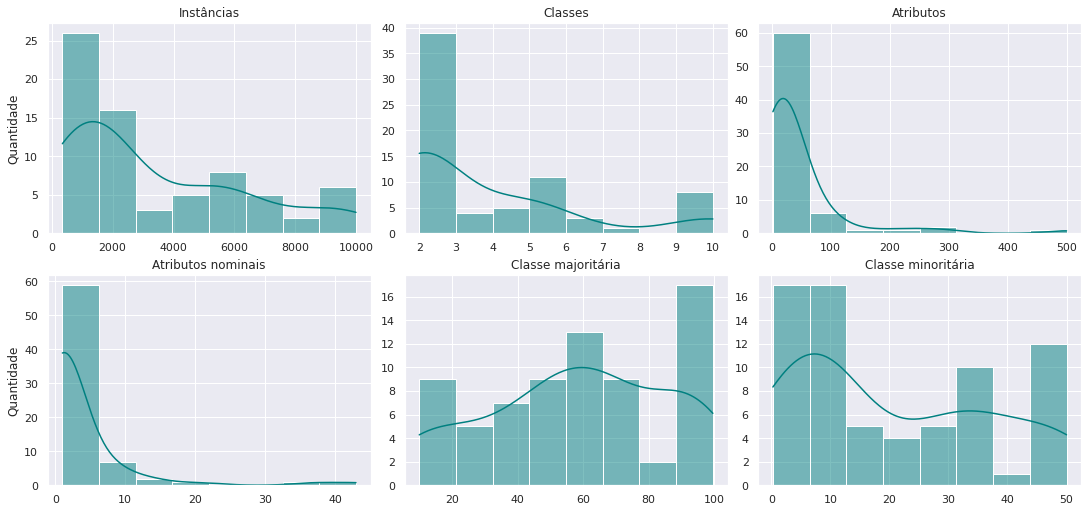

In [36]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = data

fig, axs = plt.subplots(2, 3, figsize=(15, 7), constrained_layout=True)
plt.subplot_tool()

sns.histplot(data=df, x="instances", kde=True, color="teal", ax=axs[0, 0]).set(xlabel='', ylabel='Quantidade', title = "Instâncias")
sns.histplot(data=df, x="classes", kde=True, color="teal", ax=axs[0, 1]).set(xlabel='', ylabel='', title = "Classes")
sns.histplot(data=df, x="attributes", bins = 8, kde=True, color="teal", ax=axs[0, 2]).set(xlabel='', ylabel='', title = "Atributos")
sns.histplot(data=df, x="nominal attributes", bins = 8, kde=True, color="teal", ax=axs[1, 0]).set(xlabel='', ylabel='Quantidade', title = "Atributos nominais")
sns.histplot(data=df, x="majority", kde=True, color="teal", ax=axs[1, 1]).set(xlabel='', ylabel='', title = "Classe majoritária")
sns.histplot(data=df, x="minority", kde=True, color="teal", ax=axs[1, 2]).set(xlabel='', ylabel='', title = "Classe minoritária")

plt.show()